In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/qm/y3ntm4w54lv2x8p86n_p1ml80000gn/T/ipykernel_21865/2026922495.py:6: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


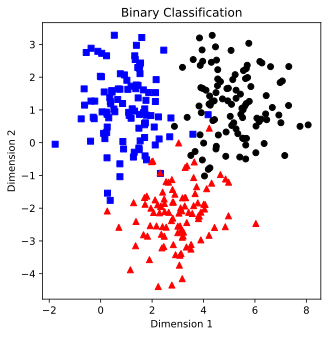

In [2]:
# create data

nPerClust = 100
blur = 1

A= [1,1]
B= [5,1]
C= [3,-2]

# generate data
a = [ A[0]+np.random.randn(nPerClust)*blur, A[1]+np.random.randn(nPerClust)*blur]
b = [ B[0]+np.random.randn(nPerClust)*blur, B[1]+np.random.randn(nPerClust)*blur]
c = [ C[0]+np.random.randn(nPerClust)*blur, C[1]+np.random.randn(nPerClust)*blur]

# true labels
labels_np = np.vstack((np.zeros((nPerClust,1)),np.ones((nPerClust,1)),1+np.ones((nPerClust,1))))

# concatenate into a matrix
data_np = np.hstack((a,b,c)).T

# convert to a pytorch tensor
data = torch.tensor(data_np).float()
labels = torch.squeeze(torch.tensor(labels_np).long())

#show the data
fig = plt.figure(figsize=(5,5))
plt.plot(data[np.where(labels==0)[0],0],data[np.where(labels==0)[0],1],'bs')
plt.plot(data[np.where(labels==1)[0],0],data[np.where(labels==1)[0],1],'ko')
plt.plot(data[np.where(labels==2)[0],0],data[np.where(labels==2)[0],1],'r^')   
plt.title('Binary Classification')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

In [3]:
#Create the ANN model
ANNq = nn.Sequential(
    nn.Linear(2,4),     # Input layer
    nn.ReLU(),          # Activation function
    nn.Linear(4,3),     # output units
    nn.Softmax(dim=1),  # final activation unit 
    )

#loss function
lossfun = nn.CrossEntropyLoss()

#optimizer
optimizer = torch.optim.SGD(ANNq.parameters(),lr=.01)

# The CrossEntropyLoss function already included the Softmax function.

In [4]:
# Test the model
yHat = ANNq(data)

print(data.shape)
print(yHat.shape)

torch.Size([300, 2])
torch.Size([300, 3])


In [5]:
# Train the Model

numepochs = 1000

# initialize losses
losses = torch.zeros(numepochs)
ongoingAcc = []

# loop over epochs
for epochi in range(numepochs):
    
    # forward pass
    yHat = ANNq(data)
    
    # compute loss
    loss = lossfun(yHat,labels)
    losses[epochi] = loss
    
    # backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # compute accuracy
    matches = torch.argmax(yHat,axis=1) == labels
    matchesNumeric= matches.float()
    accuracyPct = 100*torch.mean(matchesNumeric)
    ongoingAcc.append(accuracyPct)
    
# final forward pass
predictions = ANNq(data)

predlabels = torch.argmax(predictions,axis=1)
totalacc = 100*torch.mean((predlabels == labels).float())

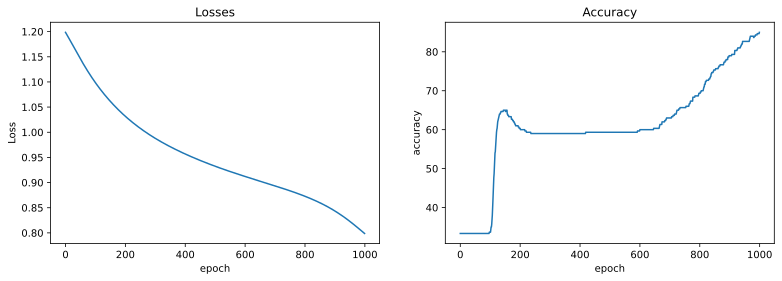

In [6]:
# Visualize the Results
# report accuracy

fig,ax = plt.subplots(1,2,figsize=(13,4))

ax[0].plot(losses.detach())
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('epoch')
ax[0].set_title('Losses')

ax[1].plot(ongoingAcc)
ax[1].set_ylabel('accuracy')
ax[1].set_xlabel('epoch')
ax[1].set_title('Accuracy')
plt.show()

In [7]:
# confirm that all model predictions sum to 1
torch.sum(yHat,axis=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 

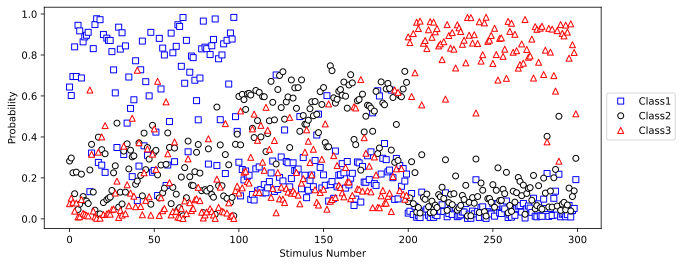

In [8]:
# plot the raw model outputs

fig = plt.figure(figsize=(10,4))

colorshape = ['bs', 'ko', 'r^']
for i in range(3):
    plt.plot(yHat[:,i].detach(),colorshape[i],markerfacecolor='w')

plt.xlabel('Stimulus Number')
plt.ylabel('Probability')
plt.legend(['Class1','Class2','Class3'],loc=(1.01,.4))
plt.show()